### Import libraries and file

In [1]:
import pandas as pd
import csv
import numpy as np
import warnings
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import complete, fcluster
from scipy.cluster.hierarchy import linkage
import seaborn as sns
from kmedoids import kmedoids

### Load npy file

In [2]:
matrix = np.load('/mnt/files/matrix.npy')

### Result Shapes

In [3]:
matrix.shape

(95458, 1226)

### Slicing consider similar objects

In [4]:
row_idx = np.array([383,393,457,521,551,552,553,567,578,579,593,599,611,628,1276,1277,2524,2644,2768,2928,2969,2970,3013,3020,3026,3070,3071,3076,3182,3312,3335,3519,3521,3522,3523,3524,3525,3526,3527,3528,3529,3809,3824,3828,3872,3873,3905,3906,3907,3975,4014,4092,4124,4145,4151,4258,4259,4341,4441,4463,4492,4493,4505,4537,4557,4564,4681,4682,4685,4692,4822,4824,4854,4934,4966,5265,5271,5434,5573,5577,5615,5851,5933,5934,5935,5936,5938,6063,6254,6255,6256,6261,6368,6675,6722,6948,6992,7044,7050,7051,7351,7392,7541,7544,7612,7615,7965,7973,7986,8038,8039,8239,8732,8770,9024,9032,9149,9150,9151,9152,9153,9169,9313,9360,9417,9444,9445,9919,10027,10375,10506,10619,11009,11010,11011,11012,11014,11015,11016,11017,11018,11019,11020,11021,11022,11023,11024,11027,11028,11029,11030,11031,11032,11033,11034,11035,11038,11116,11128,11129,11131,11132,11137,11232,11233,11234,11253,11297,11463,11471,11495,11499,11500,11631,11632,11635,11667,11823,13356,13384,13407,13699,13717,13723,13724,13742,13754,13761,13765,13766,13767,13768,13769,13770,13771,13773,13776,13777,13781,13784,13786,13790,13791,13792,13826,13902,14209,14403,14478,14479,14480,14481,14567,14666,14734,14753,14787,14797,15100,15335,15530,15531,15532,15533,15534,15535,15536,15537,15538,15539,15540,15541,15542,15543,15544,15549,15550,15551,15552,15553,15555,15556,15557,15559,15560,15561,15562,15563,15582,15583,15584,15585,15586,15587,15588,15589,15590,15591,15778,15813,15823,15824,16006,16007,16013,16108,16109,16110,16111,16112,16113,16114,16115,16116,16117,16118,16119,16120,16121,16262,16412,16420,16636,16684,16958,16960,16961,16988,17035,17036,17121,17189,17190,17350,17501,17544,17562,17563,17567,17741,17944,18027,18174,18175,18176,18177,18194,18478,18738,18803,18804,18805,18806,18808,18810,18811,18922,18924,18946,19098,19103,19458,19516,19564,19619,20233,20265,20289,20344,20423,20431,20552,20556,20573,20953,21010,21247,21318,21438,21924,22767,22857,22861,22867,23146,23147,23148,23149,23150,23151,23162,23364,23523,23609,23610,23745,23819,24346,24565,24619,24741,24834,24835,24836,24837,25020,25106,25117,25386,25424,25425,25493,25565,25861,26113,26331,26353,26354,26355,26356,26359,26360,26792,27416,27598,27634,27676,27780,27809,28204,28254,28666,28770,28772,28853,29052,29062,29128,29315,29453,29454,29570,29626,30212,30320,30861,30939,31044,31398,31470,31493,31769,32086,32088,32089,32090,32091,32092,32093,32094,32095,32096,32097,32098,32099,32100,32101,32102,32103,32104,32105,32106,32107,32108,32109,32110,32111,32112,32113,32114,32115,32116,32117,32118,32119,32120,32121,32122,32123,32124,32125,32126,32127,32128,32129,32130,32131,32132,32133,32134,32135,32136,32137,32138,32139,32140,32141,32142,32143,32144,32148,32149,32271,32396,32397,32570,32730,32750,32755,32767,32768,32837,32838,32839,32870,33036,33181,33267,33290,33292,33293,33385,33479,33537,33640,33853,34538,34600,34619,34815,34886,35059,35146,35211,35255,35450,35609,35643,35816,35872,36002,36027,36239,36240,36245,36246,36249,36251,36253,36453,36458,36646,36672,36675,36781,36784,36858,36861,36864,36866,36900,36961,37020,37021,37023,37024,37025,37026,37027,37028,37043,37372,37466,37525,37870,37908,37911,37912,37915,37916,37917,37919,37920,37923,37924,37932,37934,37959,37961,37962,37965,37966,37967,37968,37969,38461,38562,38771,38789,39313,39314,39315,39317,39494,39501,39539,40164,40356,40642,40650,40666,40667,40668,40675,40676,40677,40693,40695,40696,40698,40701,40720,40759,40761,40764,40794,40795,41571,41572,41573,41574,41673,41681,41866,42391,42410,42632,42647,42672,42813,42833,43143,43463,43511,43557,43558,43579,43717,43718,43719,43720,43787,43817,43852,44010,44011,44186,44200,44391,44568,44598,44681,44684,44996,45008,45251,45269,45370,45447,45502,45687,45746,46144,46152,46153,46195,46200,46291,46298,46762,47173,47174,47175,47176,47177,47178,47179,47180,47181,47182,47183,47184,47185,47186,47187,47188,47189,47261,47666,47729,47773,48418,48433,48442,48656,48674,48692,48699,48743,48838,48920,48927,49228,49229,49429,49624,49635,49636,49718,49900,49906,49926,49930,50084,50311,50332,50377,50524,50643,50644,50904,50907,50983,51111,51498,51504,51537,51623,51636,51661,51726,51762,51824,51825,52489,52724,52814,52815,53003,53127,53334,53409,53410,53411,53414,53415,53416,53417,53418,53419,53420,53421,53428,53429,53430,53432,53433,53434,53650,53734,53904,54336,54499,54692,54723,54724,54944,54948,54998,55124,55126,55127,55128,55129,55130,55131,55132,55133,55134,55135,55136,55137,55138,55139,55140,55199,55381,55389,55768,55876,55877,56286,56287,56289,56326,56343,56344,56345,56347,56350,56352,56353,56354,56355,56356,56357,56359,56360,56361,56362,56363,56364,56545,56572,56573,56574,56575,56576,56932,56989,57179,57200,57210,57215,57625,57626,57843,57844,57892,57952,57987,58015,58134,58185,58186,58209,58355,58589,58754,58755,59234,59235,59361,59421,59562,59694,59695,60004,60005,60119,60120,60332,60546,60547,60607,60612,60613,60684,60749,60827,60975,61021,61022,61023,61024,61025,61026,61027,61028,61029,61031,61032,61035,61404,61463,61467,61515,61854,61874,61900,62058,62441,62442,62641,62770,62868,62869,62870,62871,62872,62873,62874,62875,62876,62877,62878,62879,62880,62881,62882,62883,62884,62885,62886,62970,63179,63382,63538,63544,63549,63550,63551,63552,63801,63983,64273,64346,64715,64872,65007,65016,65120,65294,65571,65640,65667,65709,66023,66074,66145,66172,66193,66384,66422,66423,66424,66425,66426,66485,66486,66487,66488,66489,66490,66491,66492,66493,66494,66496,66522,66562,66764,66874,66877,67015,67149,67178,67727,67728,67729,67976,68411,68412,68421,68422,68426,68488,68611,68858,68859,68913,68976,68977,69008,69009,69010,69011,69012,69374,69375,69376,69378,69490,69559,69560,69571,69952,69953,70208,70209,70210,70231,70336,70441,70450,70477,70478,70569,70570,70571,70572,70573,70574,70575,70576,70577,70578,70579,70580,70581,70582,70583,70584,70585,70586,70587,70596,70600,70717,70721,70822,70995,71035,71036,71037,71095,71295,71457,71474,71660,71811,71812,71901,71902,71903,71904,71998,72078,72081,72132,72559,72645,72748,72749,72750,72751,72782,72946,73104,73131,73201,73347,73464,73489,73960,73991,74012,74426,74579,74603,75034,75035,75102,75114,75492,75766,76007,76134,76216,76623,76652,76899,77053,77139,77156,77213,77225,77264,77272,77477,77520,77521,77522,77664,77665,77707,77708,77814,77815,77886,77887,77894,78046,78155,78441,78495,78787,78815,78816,78817,78876,78878,78879,78880,78882,78908,78909,79207,79270,79676,79812,80002,80003,80004,80005,80006,80007,80008,80009,80010,80011,80012,80013,80014,80015,80016,80017,80018,80019,80020,80021,80022,80023,80024,80025,80026,80027,80028,80029,80030,80031,80032,80033,80034,80035,80036,80037,80038,80039,80040,80041,80042,80043,80044,80045,80046,80047,80048,80049,80073,80074,80075,80076,80077,80078,80079,80080,80081,80082,80083,80084,80085,80086,80087,80652,80849,80943,81208,81576,82081,82401,82834,82841,82842,82955,83432,83500,83565,83605,83855,84026,84027,84125,84152,84212,84223,84224,84225,84226,84227,84228,84229,84230,84234,84283,84562,84699,84701,84702,84704,84705,84707,85005,85006,85069,85336,85337,85338,85810,85874,85876,86084,86085,86086,86087,86088,86090,86091,86107,86228,86238,86391,86401,86402,86411,86675,86687,86731,86732,86743,86775,87273,87504,87513,87516,87556,87557,87670,87910,88004,88005,88145,88146,88147,88148,88149,88150,88151,88176,88210,88223,88439,88583,88625,88626,88627,88628,88629,88630,88631,88632,88633,88634,88635,88636,88637,88638,88639,88640,88641,88642,88643,88644,88645,88646,88647,88648,88649,88650,88651,88652,88653,88684,89030,89050,89101,89200,89201,89202,89605,89649,89659,89660,89719,89726,89810,89926,89927,89943,89975,89976,90001,90130,90235,90325,90335,90397,90549,90683,90690,90691,90693,90952,91000,91084,91085,91086,91087,91088,91106,91151,91163,91220,91263,91304,91305,91367,91369,91370,91371,91372,91373,91374,91375,91376,91377,91378,91379,91380,91578,91580,91581,91582,91583,91775,91776,91777,91890,92036,92285,92286,92287,92288,92289,92290,92291,92292,92293,92537,92538,92540,92865,92908,93162,93174,93176,93178,93181,93183,93185,93186,93187,93191,93192,93194,93200,93285,93336,93357,93361,93363,93392,93394,93536,93542,93543,93544,93545,93607,93608,93620,93627,93862,93863,93871,93886,94064,94080,94159,94279,94424,94482,94493,94494,94495,94496,94523,94572,94652,94675,94723,94950,94951,94952,94953,94961,94963,94964,94969,94970,94971,94976,94989,94991,95410])

In [5]:
matrix_sliced = matrix[row_idx, :]

In [6]:
matrix_sliced.shape

(1415, 1226)

In [7]:
upper_sm_sliced = pdist(matrix_sliced, 'cosine')

In [8]:
upper_sm_sliced.shape

(1000405,)

In [9]:
sm_sliced = np.float32(squareform(upper_sm_sliced))

### Trick to allow make huge numbers of recursion ( if needed)

In [10]:
import sys
sys.setrecursionlimit(100000)

### Hierarchy Cluster using sliced values

In [11]:
hc_sliced = linkage(upper_sm_sliced, method='complete')

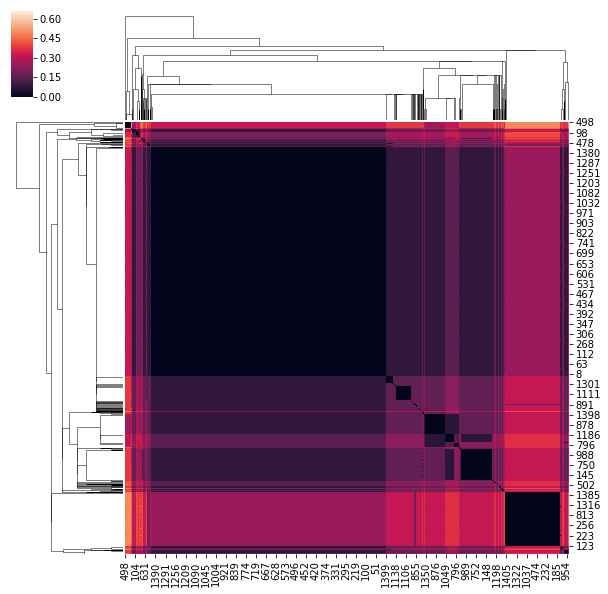

In [12]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced)

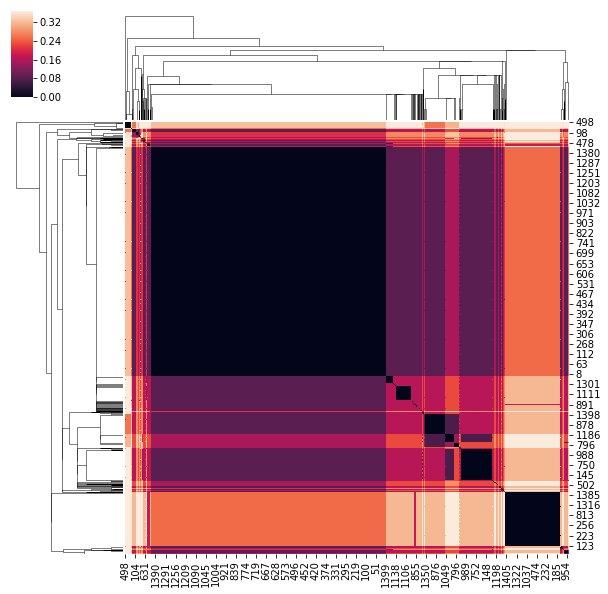

In [13]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True)

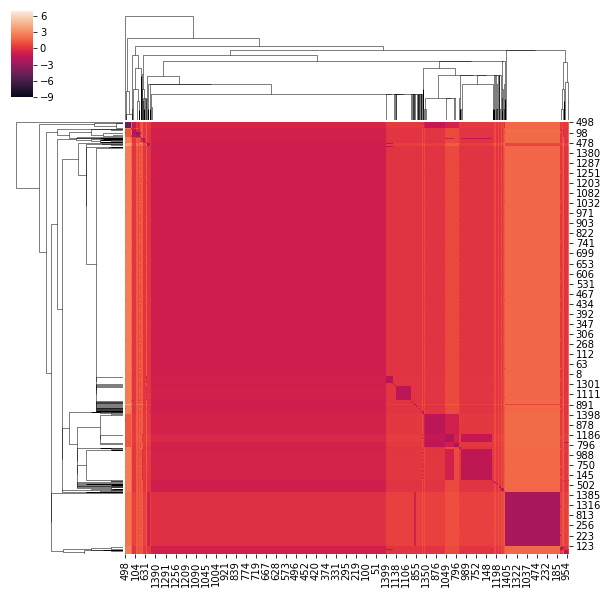

In [14]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, z_score=0)

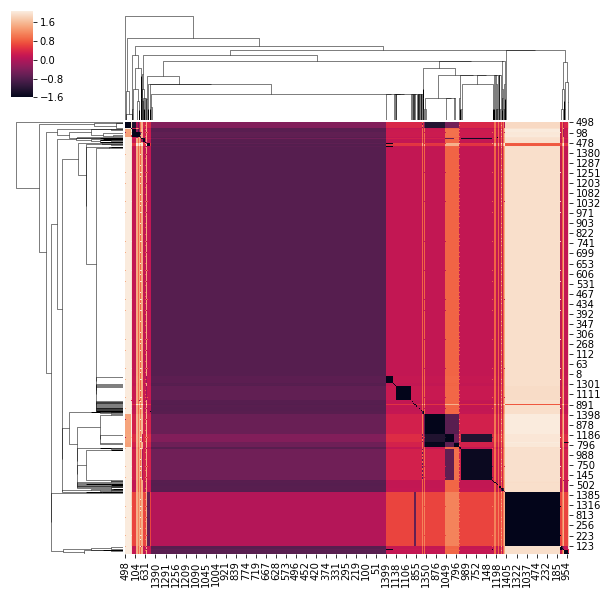

In [15]:
clustermap_sliced = sns.clustermap(sm_sliced, row_linkage=hc_sliced, col_linkage=hc_sliced, robust=True, z_score=0)